In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Expresso Churn Prediction Challenge

Expresso is an African telecommunications company that provides customers with airtime and mobile data bundles. The objective of this challenge is to develop a machine learning model to predict the likelihood of each Expresso customer “churning,” i.e. becoming inactive and not making any transactions for 90 days.

In [2]:
train = pd.read_csv('Train.csv')
train

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154043,ffffe85215ddc71a84f95af0afb0deeea90e6967,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,NaN,NaN,NO,55,"Data: 200 F=100MB,24H",9.0,0
2154045,fffff172fda1b4bb38a95385951908bb92379809,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1
2154046,fffff5911296937a37f09a37a549da2e0dad6dbb,THIES,K > 24 month,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,140.0,13.0,NaN,NaN,NO,28,All-net 500F=2000F;5d,12.0,0


In [3]:
test = pd.read_csv('Test.csv')
test

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380122,fffe7e03c7eede2ad0a728ee516c4d342dd16107,DAKAR,K > 24 month,4000.0,8.0,3999.0,1333.0,8.0,1587.0,26.0,250.0,1.0,NaN,NaN,NO,53,Mixt 250F=Unlimited_call24H,5.0
380123,fffec230e6a1aa51ab37d0051ece42de611e71c6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
380124,ffff0dcc1ab9812bf205b6d76e9d084053cd96f5,NaN,K > 24 month,3950.0,7.0,3949.0,1316.0,10.0,1724.0,25.0,71.0,NaN,NaN,NaN,NO,15,IVR Echat_Daily_50F,6.0
380125,ffff91ea6a09a0c8ea42bc6ae33df4b5e06283dc,NaN,K > 24 month,3850.0,18.0,3955.0,1318.0,23.0,2962.0,0.0,7.0,NaN,NaN,NaN,NO,29,"Data: 100 F=40MB,24H",11.0


In [4]:
sample = pd.read_csv('SampleSubmission.csv')
sample

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0
...,...,...
380122,fffe7e03c7eede2ad0a728ee516c4d342dd16107,0
380123,fffec230e6a1aa51ab37d0051ece42de611e71c6,0
380124,ffff0dcc1ab9812bf205b6d76e9d084053cd96f5,0
380125,ffff91ea6a09a0c8ea42bc6ae33df4b5e06283dc,0


In [5]:
# change column names to lower 
train = train.rename(columns=str.lower)
test = test.rename(columns=str.lower)
sample = sample.rename(columns=str.lower)

In [6]:
sample.churn.value_counts()

0    380127
Name: churn, dtype: int64

As we can see from the above, in 'sample' dataset all of the values for churn is 0. If all the target values in our test dataset will be 0, that wouldn't make any sense. That is why, we need to merge all these dataframes. Merge will be done by 'user_id'.

In [7]:
df = pd.merge(test, sample, on="user_id")
df.head()

,user_id,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,zone1,zone2,mrg,regularity,top_pack,freq_top_pack,churn
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN,0


In [8]:
train.head()

,user_id,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,zone1,zone2,mrg,regularity,top_pack,freq_top_pack,churn
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [9]:
# concatenate two tables
frames = [train, df]
data = pd.concat(frames)
data.head()

,user_id,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,zone1,zone2,mrg,regularity,top_pack,freq_top_pack,churn
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [13]:
data.shape

(2534175, 19)

In [22]:
data.isnull().sum()

user_id                 0
region             999027
tenure                  0
montant            889794
frequence_rech     889794
revenue            853421
arpu_segment       853421
frequence          853421
data_volume       1247473
on_net             925189
orange            1052478
tigo              1517017
zone1             2334593
zone2             2373275
mrg                     0
regularity              0
top_pack          1061373
freq_top_pack     1061373
churn                   0
dtype: int64

In [15]:
# x = data.churn.value_counts().values
# sns.barplot([0,1], x).set_title('Target variable count');
# plt.title('Target variable count')

## Checking for Imbalance

In [21]:
data.churn.value_counts()

0    2130189
1     403986
Name: churn, dtype: int64

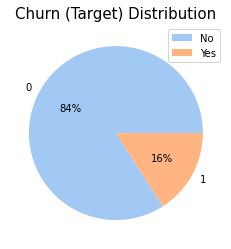

In [16]:
size = data.churn.value_counts()
labels = data.churn.value_counts().index
label=['No', 'Yes']
y = np.array(size)

colors = sns.color_palette('pastel')[0:2]
plt.pie(size, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend(label)
plt.title('Churn (Target) Distribution', fontsize=15)
plt.show()

## [models](https://www.kaggle.com/code/yasserhessein/airline-passenger-eda-7-algorithms-accuracy97)<br>
## [telecom project](https://www.kaggle.com/code/semihizinli/churn-telecom-project#3-|-Basic-Data-Analysis)

## Missing values

In [24]:
# Features with missing values
missing = data.isnull().sum().sort_values(ascending = False).head(20)
miss_percent = (missing/len(data))*100

# Percentage of missing values
pd.DataFrame({'missing values number': miss, '% of missing data': miss_percent.values})

,missing values number,% of missing data
zone2,2373275,93.650794
zone1,2334593,92.124380
tigo,1517017,59.862362
data_volume,1247473,49.226001
freq_top_pack,1061373,41.882388
top_pack,1061373,41.882388
orange,1052478,41.531386
region,999027,39.422179
on_net,925189,36.508489
montant,889794,35.111782


Percentages of missing values in 'zone1' and 'zone2' columns are greater than 90%. For that reason, we can drop those columns.
Also 'user_id' column can be dropped, because it doesn't hold any crucial information.

In [25]:
data.drop(columns=['zone1', 'zone2', 'user_id'], axis=1, inplace=True)

## Filling Missing values

## Correlation with other columns

In [18]:
data.corr()

,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,zone1,zone2,regularity,freq_top_pack,churn
montant,1.000000,0.792547,0.977077,0.977077,0.775424,0.301004,0.326788,0.658102,0.412591,0.367479,0.428252,0.522519,0.741025,-0.096410
frequence_rech,0.792547,1.000000,0.799879,0.799878,0.956089,0.153168,0.405215,0.519018,0.343066,0.119380,0.135125,0.557605,0.868894,-0.113359
revenue,0.977077,0.799879,1.000000,1.000000,0.785456,0.306957,0.331883,0.660904,0.412403,0.375688,0.383329,0.532010,0.750907,-0.104635
arpu_segment,0.977077,0.799878,1.000000,1.000000,0.785455,0.306957,0.331883,0.660905,0.412403,0.375688,0.383329,0.532008,0.750907,-0.104635
frequence,0.775424,0.956089,0.785456,0.785455,1.000000,0.169376,0.395269,0.471795,0.307009,0.108330,0.148010,0.591286,0.844751,-0.127918
data_volume,0.301004,0.153168,0.306957,0.306957,0.169376,1.000000,-0.013751,0.063236,0.023312,0.034428,0.050031,0.185202,0.118646,-0.030079
on_net,0.326788,0.405215,0.331883,0.331883,0.395269,-0.013751,1.000000,0.220366,0.137191,0.004211,-0.014369,0.270399,0.356399,-0.053917
orange,0.658102,0.519018,0.660904,0.660905,0.471795,0.063236,0.220366,1.000000,0.405491,0.048399,0.034295,0.309172,0.553584,-0.058266
tigo,0.412591,0.343066,0.412403,0.412403,0.307009,0.023312,0.137191,0.405491,1.000000,0.011792,0.020638,0.193657,0.369001,-0.032659
zone1,0.367479,0.119380,0.375688,0.375688,0.108330,0.034428,0.004211,0.048399,0.011792,1.000000,0.073597,0.044672,0.213879,0.008679


In [19]:
# Get Correlation of "churn" with other variables:
c = data.corr()['churn'].abs()
sc = c.sort_values()
a = dict(sc.tail(40))
b = a.keys()

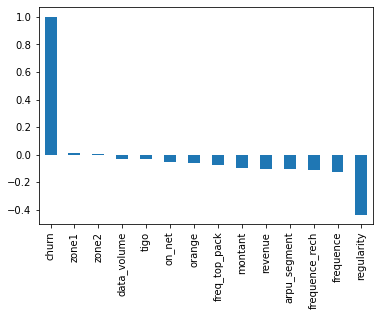

In [20]:
# fig = plt.figure(figsize=(15,8))
data[b].corr()['churn'].sort_values(ascending = False).plot(kind='bar');
# plt.show()